In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from scipy.stats import linregress
import numpy as np

data_path = os.path.join('..','merge_data','merged_data.csv')

In [2]:
df = pd.read_csv(data_path)
df.head()

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5
1,2009,21,15,197500,141050,0.0475,2.1307,0.72,PT01,2,5,1,59,5
2,2009,21,117,219000,106017,0.0475,1.6015,0.70,PT01,2,5,2,27,5
3,2009,21,37,244000,125539,0.0500,1.8964,0.80,PT01,2,5,1,32,5
4,2009,21,15,417000,360272,0.0450,5.4422,0.35,PT01,2,5,1,46,5


In [3]:
def interest(rate,amount,years):
    t = years*12
    m_rate = rate/12.
    month = amount * (m_rate*(1+m_rate)**t)/(((1+m_rate)**t)-1)
    final = round(month*years*12,2)
    return(final)
def total_paid(amount,rate,LTV,years):
    loan = interest(rate,amount,years)
    tot = amount/LTV # total value of home before interest on loan
    down_pay = round(tot-amount,2)
    total = loan + down_pay
    return(total)

In [4]:
amount = np.array(df['Amount'].tolist())
ltv = np.array(df['LTV'].tolist())
rat = np.array(df['Rate'].tolist())
tp = []
for amount,ltv,rate in zip(amount,ltv,rat):
    tp.append(total_paid(amount,rate,ltv,30))
df['Total'] = tp
df.head()

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score,Total
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5,319123.86
1,2009,21,15,197500,141050,0.0475,2.1307,0.72,PT01,2,5,1,59,5,447696.82
2,2009,21,117,219000,106017,0.0475,1.6015,0.70,PT01,2,5,2,27,5,505123.90
3,2009,21,37,244000,125539,0.0500,1.8964,0.80,PT01,2,5,1,32,5,532544.11
4,2009,21,15,417000,360272,0.0450,5.4422,0.35,PT01,2,5,1,46,5,1535064.56


In [5]:
years = df['Year'].unique()
ratio = []
rates = []
totals = []
incomes = []
new_ratio = []
for year in years:
    temp_df = df.loc[df['Year'] == year,:]
#     temp_df = temp_df.loc[temp_df['Income']<200000,:]
    ratio.append(temp_df['Amount'].median()/temp_df['Income'].median())
    rates.append(np.median(temp_df['Rate']))
    incomes.append(temp_df['Income'].median())
    totals.append(np.median(temp_df['Total']))
    total_ratio = []
    for a,b in zip(temp_df['Total'],temp_df['Income']):
        total_ratio.append(a/b)
    new_ratio.append(np.median(total_ratio))

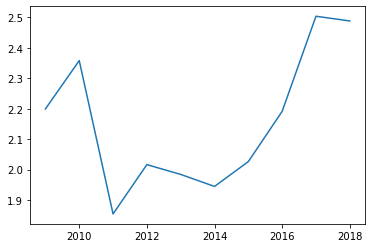

In [6]:
plt.figure()
plt.plot(years,ratio)
# plt.ylim(2,3.2)

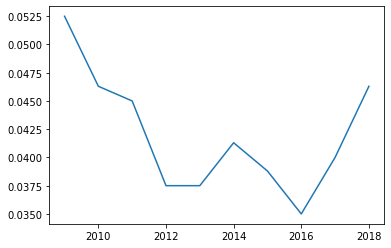

In [7]:
plt.figure()
plt.plot(years,rates)

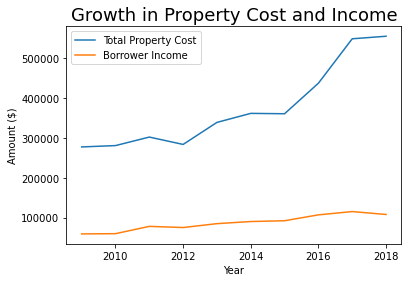

In [10]:
plt.figure()
plt.plot(years,totals,label='Total Property Cost')
plt.plot(years,incomes,label='Borrower Income')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.title('Growth in Property Cost and Income',fontsize=18)
plt.legend()
plt.savefig('PropertyCost_and_Income.png')
plt.show()

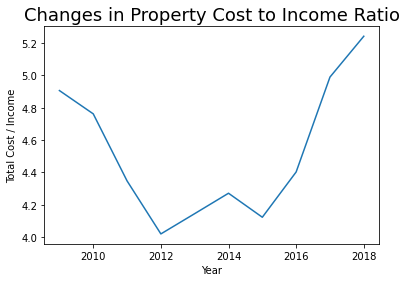

In [11]:
plt.figure()
plt.plot(years,new_ratio,label='Total ratio')
plt.xlabel('Year')
plt.ylabel('Total Cost / Income')
plt.title('Changes in Property Cost to Income Ratio',fontsize=18)
# plt.legend()
plt.savefig('PropertyCost_and_Income_Ratio.png')
plt.show()

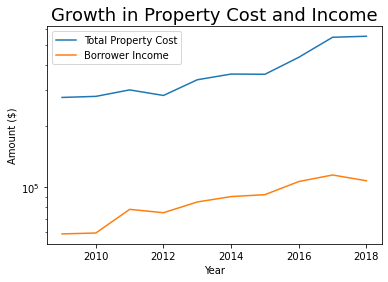

In [12]:
plt.figure()
plt.plot(years,totals,label='Total Property Cost')
plt.plot(years,incomes,label='Borrower Income')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.title('Growth in Property Cost and Income',fontsize=18)
plt.legend()
# plt.savefig('PropertyCost_and_Income.png')
plt.show()